In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np


In [142]:

# Import the relevant sklearn packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score  


In [143]:

# Set the figure size of matplotlib plots to (12,6)
plt.rcParams['figure.figsize'] = (10,10)

In [144]:
df = pd.read_csv('data/train.csv', index_col=0, parse_dates = True)
df.head()



,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [145]:
# df.insert(0, 'day_of_week', df.index.dayofweek)
df = df.drop(['casual','registered'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 850.5 KB


In [146]:
df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


<AxesSubplot:>

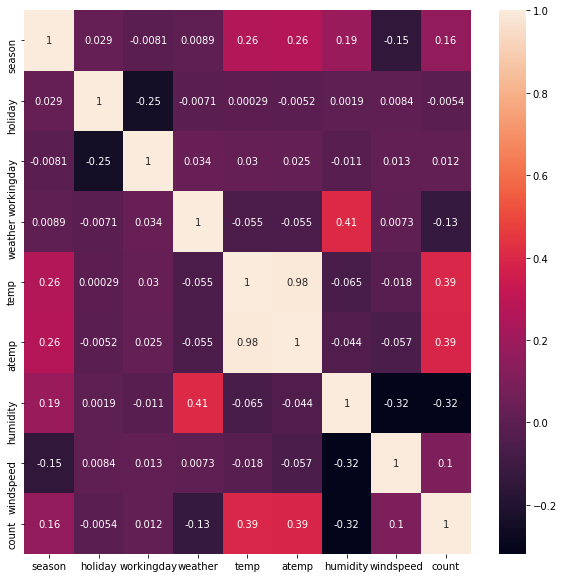

In [147]:

sns.heatmap(df.corr(), annot=True)



In [148]:
del df['temp']
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X 

,season,holiday,workingday,weather,atemp,humidity,windspeed
datetime,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,0.0000
2011-01-01 01:00:00,1,0,0,1,13.635,80,0.0000
2011-01-01 02:00:00,1,0,0,1,13.635,80,0.0000
2011-01-01 03:00:00,1,0,0,1,14.395,75,0.0000
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.0000
...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,19.695,50,26.0027
2012-12-19 20:00:00,4,0,1,1,17.425,57,15.0013
2012-12-19 21:00:00,4,0,1,1,15.910,61,15.0013


In [149]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 7), (2722, 7), (8164,), (2722,))

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:

rf = RandomForestRegressor(max_depth=5, random_state=0)

In [152]:

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [153]:

pd.DataFrame({'importance': rf.feature_importances_, 'feature': X_train.columns}).\
sort_values('importance', ascending=False)  #feature_importance- use for RF model

,importance,feature
4,0.551259,atemp
5,0.308687,humidity
0,0.076955,season
2,0.039338,workingday
6,0.017718,windspeed
3,0.005797,weather
1,0.000247,holiday


In [154]:

from sklearn.linear_model import Lasso

In [155]:

l = Lasso()

In [156]:

l.fit(X_train, y_train)

Lasso()

In [157]:

pd.DataFrame({'feature': X_train.columns, 'coefficient': np.abs(l.coef_)}).sort_values('coefficient', ascending=False)

,feature,coefficient
0,season,22.413410
4,atemp,7.175833
3,weather,3.071878
5,humidity,3.011844
6,windspeed,0.840557
1,holiday,0.000000
2,workingday,0.000000


In [158]:
m = LinearRegression()
m.fit(X_train,y_train)
ypred = m.predict(X_test)


In [159]:

m.score(X_train, y_train)


0.2578137738504942

In [160]:
m.score(X_test, y_test)




0.26919072172009206

In [162]:
def RMSLE(y_train,y_pred):
    return np.sqrt(mean_squared_log_error(y_train, y_pred))

In [164]:
RMSLE(y_train, ypred)

NameError: name 'mean_squared_log_error' is not defined

In [ ]:
To optimize your model against the RMSLE, you should take the logarithm of the target colum (y). Because 0 is a valid target value, use the log of 𝑦+1 instead:

ylog = np.log1p(y)
Then train your model on the transformed column ylog. To bring back your log predictions to the original scale you have to apply the inverse transformation on the predictions:

ypred = np.exp(ypredlog)-1
You can then calculate the RMSLE score using sklearn:

from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y, ypred))

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (20,12))

sns.countplot(train["season"], ax = axes[0], palette="Set1")
sns.countplot(train["weather"], ax = axes[1], palette="Set1")
sns.countplot(train["windspeed"], ax = axes[2])
plt.xticks(rotation = 60, )

In [ ]:
_, axes = plt.subplots(1,1, figsize = (20,12))
sns.boxplot(x=train["hour"], y=train["count"])

In [ ]:
df['ideal'] = df[['temp', 'windspeed']].apply(lambda x: (0, 1)[x['temp'] > 27 and x['windspeed'] < 30], axis = 1)
df['sticky'] = df[['humidity', 'workingday']].apply(lambda x: (0, 1)[x['workingday'] == 1 and x['humidity'] >= 60], axis = 1)